In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import random
import PIL.Image as Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
train_zip_path="train.zip"

In [3]:
test_zip_path="test1.zip"

In [ ]:
# חילוץ train.zip
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall("train")
print("train files extracted")

In [ ]:
# חילוץ train.zip
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall("test")
print("train files extracted")

In [6]:
train_path = "train/train"

In [7]:
test_path = "test/test1"

C:\Users\eden.amram\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


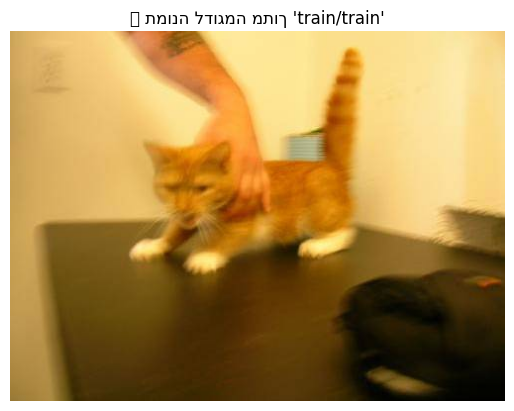

In [ ]:
# בדיקת קבצי תמונה בתיקייה
image_files = [f for f in os.listdir(train_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    sample_image_path = os.path.join(train_path, image_files[0])
    img = Image.open(sample_image_path)

    plt.imshow(img)
    plt.axis("off")
    plt.title("📷 תמונה לדוגמה מתוך 'train/train'")
    plt.show()
else:
    print("❌ לא נמצאו קבצי תמונה בתיקייה.")

1. Exploratory Data Analysis (EDA)

In [46]:
# Count the number of images in each folder
num_train_images = sum([len(files) for _, _, files in os.walk(train_path)])
num_test_images = sum([len(files) for _, _, files in os.walk(test_path)])

print(f"📊 Number of images in Train set: {num_train_images}")
print(f"📊 Number of images in Test set: {num_test_images}")

# Check for subfolders (categories)
categories = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]
print(f"📂 Categories in dataset: {categories}")

📊 Number of images in Train set: 25000
📊 Number of images in Test set: 12500
📂 Categories in dataset: []


In [47]:
# Get all image files directly inside train_path
image_files = [f for f in os.listdir(train_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

print(f"🖼️ Found {len(image_files)} images in 'train/train'")

🖼️ Found 25000 images in 'train/train'


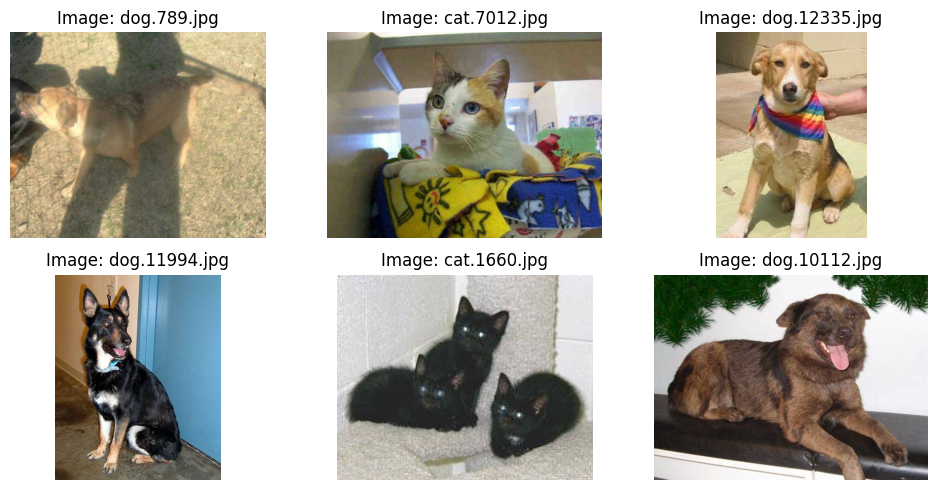

In [ ]:
# Step 2: Display Sample Images

# Select 6 random images for display
sample_images = random.sample(image_files, min(6, len(image_files)))

plt.figure(figsize=(10, 5))

for i, img_file in enumerate(sample_images):
    img_path = os.path.join(train_path, img_file)

    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Image: {img_file}")
    except Exception as e:
        print(f"❌ Error loading image {img_path}: {e}")

plt.tight_layout()
plt.show()


C:\Users\eden.amram\AppData\Local\Temp\ipykernel_10024\4128188975.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="viridis")


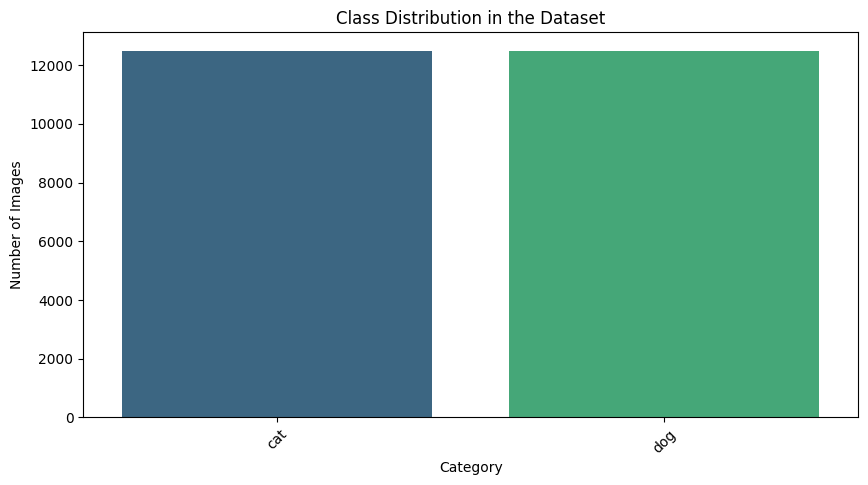

In [56]:
# Step 3: Checking Class Distribution

cat_count = sum(1 for img in image_files if "cat" in img.lower())
dog_count = sum(1 for img in image_files if "dog" in img.lower())

category_counts = {"cat": cat_count, "dog": dog_count}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="viridis")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 4: Checking Image Sizes
image_shapes = []

# Iterate through a subset of images (for efficiency)
sample_size = min(500, len(image_files))  # Limit to 500 images for performance
sample_images = np.random.choice(image_files, sample_size, replace=False)

for img_file in sample_images:
    img_path = os.path.join(train_path, img_file)
    img = cv2.imread(img_path)

    if img is not None:
        image_shapes.append(img.shape[:2])  # (height, width)

image_shapes = np.array(image_shapes)

# Print mean and standard deviation
print(f"📏 Average Image Size: {image_shapes.mean(axis=0)}")
print(f"📏 Standard Deviation of Image Sizes: {image_shapes.std(axis=0)}")

📏 Average Image Size: [361.28  405.332]
📏 Standard Deviation of Image Sizes: [ 96.37286755 107.60181121]


In [58]:
# Step 5: Checking Pixel Mean & Standard Deviation
all_pixels = []

# Process a sample of images for efficiency
sample_size = min(500, len(image_files))
sample_images = np.random.choice(image_files, sample_size, replace=False)

for img_file in sample_images:
    img_path = os.path.join(train_path, img_file)
    img = cv2.imread(img_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        all_pixels.append(img / 255.0)  # Normalize to range [0,1]

# Convert to NumPy array
all_pixels = np.concatenate([img.flatten() for img in all_pixels])

# Calculate mean and standard deviation
pixel_mean = np.mean(all_pixels)
pixel_std = np.std(all_pixels)

print(f"🎨 Average Pixel Intensity: {pixel_mean}")
print(f"🎨 Standard Deviation of Pixels: {pixel_std}")

🎨 Average Pixel Intensity: 0.45609238013129566
🎨 Standard Deviation of Pixels: 0.26177879013417243


2. Preprocessing

In [59]:
# Step 1: Data Cleaning - Checking for Corrupted Images
corrupt_files = []

# Check all images
for img_file in image_files:
    img_path = os.path.join(train_path, img_file)
    img = cv2.imread(img_path)

    # If the file cannot be read, it's likely corrupted
    if img is None:
        corrupt_files.append(img_path)

# Display and remove corrupted images
if corrupt_files:
    print(f"⚠️ Found {len(corrupt_files)} corrupted images. Removing them...")
    for file in corrupt_files:
        os.remove(file)
    print("✅ Corrupted images removed successfully.")
else:
    print("✅ No corrupted images found. Dataset is clean!")

✅ No corrupted images found. Dataset is clean!


In [ ]:
# Step 2: Resizing Images and Normalization

# Define the new image size
IMG_SIZE = (64, 64)

# Function to resize and normalize an image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize image to 64x64
    img = img_to_array(img) / 255.0  # Convert the image to an array and normalize to range [0, 1]
    return img.astype(np.float16)  # Ensure data type is float16 for better performance

print(f"✅ Image successfully resized to {IMG_SIZE} and normalized.")

✅ Image successfully resized to (64, 64) and normalized.


In [ ]:
def processed_images_all_data(image_files):
    return np.array([preprocess_image(os.path.join(train_path, img)) for img in image_files])

In [ ]:
processed_images = np.array([preprocess_image(os.path.join(train_path, img)) for img in image_files])
print("Processed images shape:", processed_images.shape)

Processed images shape: (25000, 64, 64, 3)


In [31]:
from sklearn.model_selection import train_test_split

processed_images = processed_images_all_data(image_files)

labels = [1 if "dog" in img else 0 for img in image_files]
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42)  

print(f"🖼️ {len(train_images)} training images and {len(val_images)} validation images loaded successfully and {len(test_images)}.")

🖼️ 15000 training images and 5000 validation images loaded successfully and 5000.


Decision Tree Algoritam

In [ ]:
def preprocess_image_for_tree(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize
    img = img_to_array(img) / 255.0  # Normalize
    return img.flatten().astype(np.float32)  # Flatten

tree_images = np.array([preprocess_image_for_tree(os.path.join(train_path, img)) for img in image_files])

In [13]:
labels = [1 if "dog" in img else 0 for img in image_files]  # Make sure this is defined correctly
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    tree_images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42)


In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(train_images, train_labels)  # Use the correctly flattened and split images

# Predictions on validation and test sets
y_val_pred = clf.predict(val_images)  
y_test_pred = clf.predict(test_images)  

# Evaluate model performance
val_acc = accuracy_score(val_labels, y_val_pred)
test_acc = accuracy_score(test_labels, y_test_pred)

print(f"📊 Validation Accuracy: {val_acc:.4f}")
print(f"📊 Test Accuracy: {test_acc:.4f}")


📊 Validation Accuracy: 0.5714
📊 Test Accuracy: 0.5792


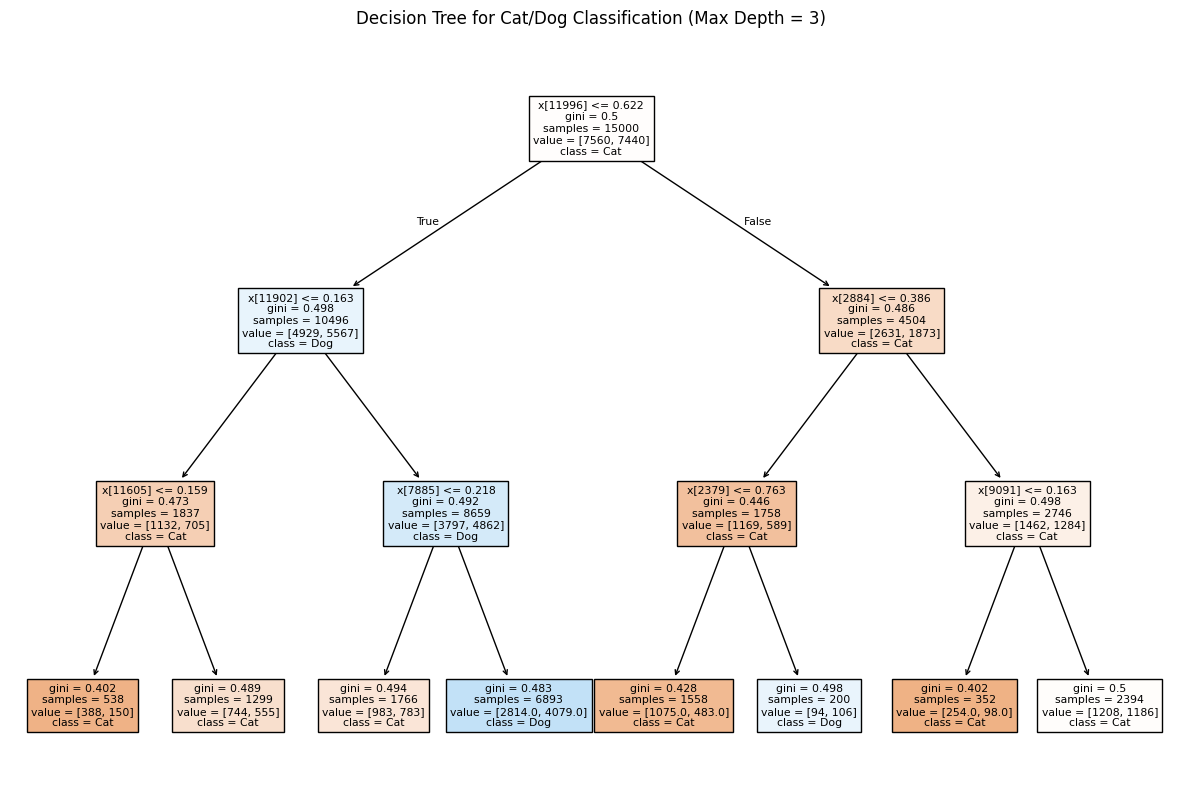

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=None, class_names=["Cat", "Dog"], filled=True)
plt.title('Decision Tree for Cat/Dog Classification (Max Depth = 3)')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_probs = clf.predict_proba(test_images)[:, 1] 

# Compute evaluation metrics
accuracy = accuracy_score(test_labels, y_test_pred) 
precision = precision_score(test_labels, y_test_pred)
recall = recall_score(test_labels, y_test_pred)
f1 = f1_score(test_labels, y_test_pred)
auc = roc_auc_score(test_labels, y_probs)

# Display results
print(f"📊 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")

📊 Model Performance Metrics:
✅ Accuracy: 0.5792
✅ Precision: 0.5810
✅ Recall: 0.5497
✅ F1-score: 0.5649
✅ AUC-ROC: 0.5932


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), #if i change the img size i need to change the input shape
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print(val_labels)

[1 0 0 ... 1 1 0]


In [38]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

history = model.fit(train_images, train_labels, epochs=30,validation_data=(val_images, val_labels))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.8192 - val_loss: 1.3029
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9914 - loss: 0.0210 - val_accuracy: 0.8208 - val_loss: 1.0433
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9936 - loss: 0.0185 - val_accuracy: 0.8214 - val_loss: 1.1341
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9902 - loss: 0.0289 - val_accuracy: 0.8238 - val_loss: 1.1967
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.8200 - val_loss: 1.0947
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9934 - loss: 0.0193 - val_accuracy: 0.8290 - val_loss: 1.2460
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9938 - loss: 0.0176 - val_accuracy: 0.8180 - val_loss: 1.1897
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9916 - loss: 0.0258 - 

In [ ]:
model.save_weights("ht_weights.weights.h5")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_probs = model.predict(test_images) 
y_probs = y_probs.flatten()         

# 2. Converting probabilities into binary predictions at a threshold of 0.5
y_pred = (y_probs >= 0.5).astype(int)


157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


In [ ]:
#8
test_labels = np.array(test_labels)

accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
auc = roc_auc_score(test_labels, y_probs)

print(f"📊 CNN Model Performance Metrics on Test Set:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")


📊 CNN Model Performance Metrics on Test Set:
✅ Accuracy: 0.8214
✅ Precision: 0.8300
✅ Recall: 0.8056
✅ F1-score: 0.8176
✅ AUC-ROC: 0.9054


In [39]:
#9
from tensorflow.keras.optimizers import Adam

def build_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid') 
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
#hyperparameter learning rate
learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    model = build_model(learning_rate=lr, dropout_rate=0.5)
    history = model.fit(
        train_images, train_labels,
        epochs=10, 
        batch_size=32, 
        validation_data=(val_images, val_labels),
        verbose=1
    )


c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.5002 - loss: 323.9031 - val_accuracy: 0.5150 - val_loss: 0.6928
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.4993 - loss: 0.6947 - val_accuracy: 0.5150 - val_loss: 0.6933
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.5010 - loss: 0.6946 - val_accuracy: 0.4850 - val_loss: 0.7029
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.5036 - loss: 0.6956 - val_accuracy: 0.5150 - val_loss: 0.6965
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.5062 - loss: 0.6953 - val_accuracy: 0.4850 - val_loss: 0.6974
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.5060 - loss: 0.6949 - val_accuracy: 0.4850 - val_loss: 0.6935
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 114ms/step - accuracy: 0.5008 - loss: 0.6949 - val_accuracy: 0.5150 - val_loss: 0.6928
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.4892 - loss: 0.6

In [ ]:
#hyperparameter batch
batch_sizes = [16, 32, 64]

for bs in batch_sizes:
    model = build_model(learning_rate=0.001, dropout_rate=0.5)
    history = model.fit(
        train_images, train_labels,
        epochs=10,
        batch_size=bs,
        validation_data=(val_images, val_labels),
        verbose=1
    )


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.5457 - loss: 0.6801 - val_accuracy: 0.7166 - val_loss: 0.5617
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.7315 - loss: 0.5339 - val_accuracy: 0.7566 - val_loss: 0.4992
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.7833 - loss: 0.4562 - val_accuracy: 0.7942 - val_loss: 0.4441
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8126 - loss: 0.4079 - val_accuracy: 0.8020 - val_loss: 0.4249
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.8375 - loss: 0.3491 - val_accuracy: 0.7944 - val_loss: 0.4574
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.8704 - loss: 0.3015 - val_accuracy: 0.8236 - val_loss: 0.4009
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8922 - loss: 0.2598 - val_accuracy: 0.8272 - val_loss: 0.4065
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9114 - loss: 0.2130 - 

In [ ]:
#hyperparameter dropout
dropout_rates = [0.3, 0.5, 0.7]

for dr in dropout_rates:
    model = build_model(learning_rate=0.001, dropout_rate=dr)
    history = model.fit(
        train_images, train_labels,
        epochs=10,
        batch_size=32,
        validation_data=(val_images, val_labels),
        verbose=1
    )


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.5615 - loss: 0.6696 - val_accuracy: 0.6898 - val_loss: 0.5980
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.7365 - loss: 0.5328 - val_accuracy: 0.7740 - val_loss: 0.4789
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.7852 - loss: 0.4489 - val_accuracy: 0.8078 - val_loss: 0.4190
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.8204 - loss: 0.3920 - val_accuracy: 0.8262 - val_loss: 0.3970
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.8425 - loss: 0.3461 - val_accuracy: 0.8328 - val_loss: 0.3783
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.8791 - loss: 0.2844 - val_accuracy: 0.8270 - val_loss: 0.3983
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.8995 - loss: 0.2420 - val_accuracy: 0.8260 - val_loss: 0.4273
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9237 - loss: 0.1834 - 

In [45]:
#10
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images)
y_pred_classes = (y_pred >= 0.5).astype(int)
cm = confusion_matrix(test_labels, y_pred_classes)
print(cm)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
[[2239  276]
 [ 601 1884]]


In [ ]:
#check the misclassified images (FN, FP)
misclassified_indices = [i for i in range(len(test_labels)) if test_labels[i] != y_pred[i]]

print(misclassified_indices)


[2, 16, 37, 40, 41, 43, 46, 52, 54, 56, 57, 58, 68, 76, 82, 84, 88, 102, 111, 120, 123, 124, 128, 145, 153, 160, 163, 165, 172, 176, 179, 189, 191, 195, 199, 202, 218, 232, 234, 235, 250, 252, 255, 258, 261, 262, 263, 267, 271, 272, 281, 290, 295, 296, 308, 312, 317, 318, 322, 328, 344, 346, 348, 360, 364, 369, 382, 390, 394, 396, 401, 414, 417, 419, 423, 427, 428, 433, 450, 466, 476, 478, 497, 500, 501, 509, 512, 522, 525, 526, 542, 547, 548, 549, 551, 554, 557, 559, 560, 566, 572, 574, 593, 603, 606, 607, 609, 615, 632, 633, 634, 635, 643, 649, 650, 655, 664, 671, 675, 679, 683, 702, 706, 707, 711, 742, 747, 750, 764, 768, 785, 787, 799, 803, 808, 813, 817, 819, 825, 832, 836, 844, 846, 848, 854, 855, 865, 881, 905, 914, 929, 934, 936, 949, 953, 954, 957, 966, 975, 976, 988, 994, 996, 999, 1002, 1010, 1012, 1016, 1018, 1024, 1035, 1037, 1038, 1047, 1052, 1054, 1058, 1061, 1063, 1077, 1083, 1090, 1092, 1094, 1102, 1110, 1111, 1113, 1116, 1117, 1118, 1125, 1138, 1144, 1147, 1148, 1156,

In [ ]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid') 
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [86]:
model = build_model()

# load weights
model.load_weights("ht_weights.weights.h5")
print("Loaded weights from 'ht_weights.weights.h5'")


c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loaded weights from 'ht_weights.weights.h5'


c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import numpy as np

test_labels = np.array(test_labels)

X_mis = test_images[misclassified_indices]
y_mis = test_labels[misclassified_indices]

print("Misclassified subset shape:", X_mis.shape)
print("Misclassified labels shape:", y_mis.shape)


Misclassified subset shape: (893, 64, 64, 3)
Misclassified labels shape: (893,)


In [ ]:
#Fine Tuning
X_combined = np.concatenate([train_images, X_mis], axis=0)
y_combined = np.concatenate([train_labels, y_mis], axis=0)

history_fine = model.fit(
    X_combined, y_combined,
    epochs=5,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)


Epoch 1/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9410 - loss: 0.2633 - val_accuracy: 0.8394 - val_loss: 0.4811
Epoch 2/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step - accuracy: 0.9634 - loss: 0.1065 - val_accuracy: 0.8406 - val_loss: 0.5680
Epoch 3/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.9779 - loss: 0.0628 - val_accuracy: 0.8400 - val_loss: 0.6126
Epoch 4/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.9841 - loss: 0.0432 - val_accuracy: 0.8332 - val_loss: 0.8093
Epoch 5/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.9859 - loss: 0.0383 - val_accuracy: 0.8394 - val_loss: 0.7753


# To increase the model's accuracy, we first examined where the model went wrong
# using a confusion matrix. We then identified the specific examples it misclassified
# and performed fine-tuning. Fine-tuning involves continuing the training of the model
# (with the same architecture and previously saved weights), specifically focusing on
# challenging or misclassified samples. This helps the model correct its mistakes
# and improve performance without losing its existing knowledge.

In [85]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,         # סיבוב עד 20 מעלות
    width_shift_range=0.2,     # הזזה אופקית עד 20%
    height_shift_range=0.2,    # הזזה אנכית עד 20%
    shear_range=0.2,           # גזירה (shear) עד 20%
    zoom_range=0.2,            # זום פנימי/חיצוני עד 20%
    horizontal_flip=True,      # היפוך אופקי
    fill_mode='nearest'        # מילוי פיקסלים חסרים
)

train_generator = datagen.flow(processed_images, labels, batch_size=32)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=(val_images, val_labels)
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.8340 - loss: 0.3773 - val_accuracy: 0.8684 - val_loss: 0.3021
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 202ms/step - accuracy: 0.8372 - loss: 0.3626 - val_accuracy: 0.8570 - val_loss: 0.3088
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.8395 - loss: 0.3550 - val_accuracy: 0.8848 - val_loss: 0.2770
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 213ms/step - accuracy: 0.8438 - loss: 0.3422 - val_accuracy: 0.8852 - val_loss: 0.2733
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 176ms/step - accuracy: 0.8472 - loss: 0.3380 - val_accuracy: 0.8844 - val_loss: 0.2708
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 267ms/step - accuracy: 0.8521 - loss: 0.3395 - val_accuracy: 0.8738 - val_loss: 0.2829
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 218ms/step - accuracy: 0.8546 - loss: 0.3305 - val_accuracy: 0.8946 - val_loss: 0.2390
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 188ms/step - accuracy: 0.8576 - l

In [ ]:
#11
import os
import random

cat_files = [f for f in image_files if "cat" in f.lower()]
dog_files = [f for f in image_files if "dog" in f.lower()]

print("Initial number of cat images:", len(cat_files))
print("Initial number of dog images:", len(dog_files))

#A small percentage (20%) of the cat photos is randomly selected
ratio_to_keep = 0.2
num_cats_to_keep = int(ratio_to_keep * len(cat_files))
cat_files_small = random.sample(cat_files, num_cats_to_keep)
#A small percentage (10%) of the dogs photos is randomly selected
num_dogs_to_keep = int(0.1 * len(dog_files))
dogs_files_small = random.sample(dog_files, num_dogs_to_keep)

#create a list of all unbalanced files
unbalanced_files = cat_files_small + dogs_files_small

print("After removal, cat images:", len(cat_files_small))
print("Dog images remain:", len(dog_files))
print("Total unbalanced dataset size:", len(unbalanced_files))


Initial number of cat images: 12500
Initial number of dog images: 12500
After removal, cat images: 2500
Dog images remain: 12500
Total unbalanced dataset size: 3750


In [ ]:
unbalanced_images = []
unbalanced_labels = []

for f in unbalanced_files:
    full_path = os.path.join(train_path, f)
    unbalanced_images.append(preprocess_image(full_path))

    if "dog" in f.lower():
        unbalanced_labels.append(1)
    else:  # cat
        unbalanced_labels.append(0)

unbalanced_images = np.array(unbalanced_images)
unbalanced_labels = np.array(unbalanced_labels)

In [ ]:
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    unbalanced_images, unbalanced_labels, test_size=0.2, random_state=42
)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42
)

In [ ]:
model = build_model()

c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.6335 - loss: 0.6682 - val_accuracy: 0.6400 - val_loss: 0.6541
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.6741 - loss: 0.6398 - val_accuracy: 0.6400 - val_loss: 0.6302
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6721 - loss: 0.6118 - val_accuracy: 0.6400 - val_loss: 0.6612
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.6788 - loss: 0.6039 - val_accuracy: 0.6800 - val_loss: 0.6220
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.7127 - loss: 0.5745 - val_accuracy: 0.6720 - val_loss: 0.6042
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7136 - loss: 0.5563 - val_accuracy: 0.6573 - val_loss: 0.6151
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7343 - loss: 0.5196 - val_accuracy: 0.7187 - val_loss: 0.5667
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7788 - loss: 0.4869 - val_accuracy: 0.74

In [ ]:
#12
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_improved_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        BatchNormalization(),                # הוספת Batch Norm אחרי השכבה הראשונה
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),                # Batch Norm גם פה
        MaxPooling2D(2, 2),
        
        # שכבת קונבולוציה נוספת להעמקת הרשת
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
model = build_improved_model()

In [ ]:
processed_images = processed_images_all_data(image_files)

labels = [1 if "dog" in img else 0 for img in image_files]
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42)  


In [ ]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 147ms/step - accuracy: 0.6841 - loss: 0.6108 - val_accuracy: 0.6988 - val_loss: 0.5811
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - accuracy: 0.7729 - loss: 0.4755 - val_accuracy: 0.7474 - val_loss: 0.5317
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - accuracy: 0.8037 - loss: 0.4227 - val_accuracy: 0.7066 - val_loss: 0.6035
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.8478 - loss: 0.3424 - val_accuracy: 0.7432 - val_loss: 0.5345
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.8719 - loss: 0.2913 - val_accuracy: 0.7598 - val_loss: 0.5259
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9020 - loss: 0.2383 - val_accuracy: 0.7936 - val_loss: 0.4822
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9234 - loss: 0.1922 - val_accuracy: 0.8100 - val_loss: 0.4285
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.9399 - loss: 0

# 1. Added Batch Normalization (BatchNormalization) layers:
#    - Placed after each Conv2D layer. Batch Norm helps stabilize learning by
#      normalizing the outputs of the preceding layer, which often allows the
#      network to converge faster and can improve overall performance.

# 2. Introduced an additional Conv2D layer:
#    - We now have three convolutional layers (32 filters, 64 filters, and then
#      128 filters), compared to only two in the older model. A deeper network
#      can capture more complex features, enhancing the model's ability to
#      distinguish subtle differences between images.

# 3. Maintained the existing Flatten, Dense(512), and Dropout(0.5) layers:
#    - These layers still provide the fully connected classification portion and
#      help prevent overfitting via Dropout.

# 4. Overall effect on performance and speed:
#    - More layers and filters = more parameters, which might slow each epoch
#      slightly, but Batch Norm typically helps each epoch converge faster.
#    - Expected outcome: better accuracy or more stable training, provided the
#      dataset and model size are well-matched.

# In summary, the new function adds both depth (by introducing another Conv2D
# layer) and stability (through Batch Normalization), making the network more
# powerful and potentially more resilient against overfitting. 


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 134ms/step - accuracy: 0.9832 - auc: 0.9963 - loss: 0.0576 - val_accuracy: 0.8302 - val_auc: 0.9090 - val_loss: 0.7498
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 176ms/step - accuracy: 0.9837 - auc: 0.9980 - loss: 0.0447 - val_accuracy: 0.8020 - val_auc: 0.8854 - val_loss: 1.0492
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - accuracy: 0.9854 - auc: 0.9984 - loss: 0.0401 - val_accuracy: 0.8204 - val_auc: 0.8920 - val_loss: 1.0569
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - accuracy: 0.9847 - auc: 0.9970 - loss: 0.0528 - val_accuracy: 0.8382 - val_auc: 0.9129 - val_loss: 0.6157
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 151ms/step - accuracy: 0.9875 - auc: 0.9987 - loss: 0.0328 - val_accuracy: 0.8496 - val_auc: 0.9040 - val_loss: 0.8508
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9886 - auc: 0.9986 - loss: 0.0321 - val_accuracy: 0.8418 - val_auc: 0.9121 - val_loss: 0.7839
Epoch 7/10
469/469 ━━━

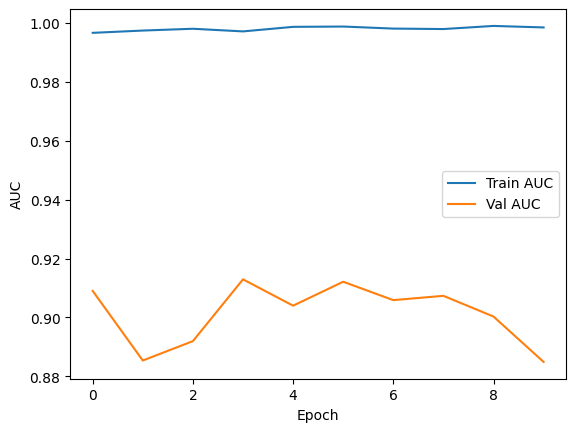

In [ ]:
#13
from tensorflow.keras.metrics import AUC

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)

history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels)
)

import matplotlib.pyplot as plt

plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()


# Summary of Section 13:
# We introduced a new metric, AUC (Area Under the ROC Curve), in addition to accuracy.
# By adding AUC to model.compile (e.g., metrics=['accuracy', AUC(name='auc')]),
# we tracked both training and validation AUC across all epochs.
#
# Observations:
# - The training AUC quickly rose near 1.0, indicating the model fits the training data quite well.
# - The validation AUC hovered around 0.88–0.90, occasionally reaching ~0.91, but declined toward the final epochs.
# - This gap between training and validation AUC, along with a drop in validation metrics, suggests potential overfitting.
#
# Conclusions:
# - Although accuracy on the training set is very high (98–99%), validation accuracy stabilizes around 0.79–0.84,
#   showing the model may be memorizing training examples rather than generalizing.
# - Adding AUC helps reveal that the model's ability to distinguish classes on unseen data is less than on training data.
# - We could address overfitting by adding stronger regularization (e.g., higher Dropout, additional BatchNorm),
#   lowering the learning rate, or applying Early Stopping based on validation performance.

In [ ]:
def evaluate_model_performance(test_labels, y_pred, y_probs):

    test_labels = np.array(test_labels)

    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred)
    recall = recall_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred)
    auc = roc_auc_score(test_labels, y_probs)

    # Print results
    print("📊 Model Performance Metrics on Test Set:")
    print(f"✅ Accuracy:  {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall:    {recall:.4f}")
    print(f"✅ F1-score:  {f1:.4f}")
    print(f"✅ AUC-ROC:   {auc:.4f}")


In [ ]:
ratios = [0.5, 0.25, 0.1]

for ratio in ratios:
    
    num_cats_to_keep = int(ratio * len(cat_files))
    
    cat_subset = random.sample(cat_files, num_cats_to_keep)
    
    unbalanced_files = cat_subset + dog_files
    
    print(f"Ratio {ratio}: cat={len(cat_subset)}, dog={len(dog_files)}, total={len(unbalanced_files)}")
    
    processed_images = processed_images_all_data(image_files)    

    labels = [1 if "dog" in img else 0 for img in image_files]

    train_val_images, test_images, train_val_labels, test_labels = train_test_split(
        unbalanced_images, unbalanced_labels, test_size=0.2, random_state=42
    )
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_val_images, train_val_labels, test_size=0.25, random_state=42
    )
    
    model = build_model()
    
    history = model.fit(
        train_images, train_labels,
        epochs=10,
        validation_data=(val_images, val_labels),
        verbose=1
    )

    y_probs = model.predict(test_images).flatten() 
    y_pred = (y_probs >= 0.5).astype(int)
    evaluate_model_performance(test_labels, y_pred, y_probs)

Ratio 0.5: cat=6250, dog=12500, total=18750
Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.6572 - loss: 0.6768 - val_accuracy: 0.6400 - val_loss: 0.6550
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6664 - loss: 0.6322 - val_accuracy: 0.6400 - val_loss: 0.6206
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.6551 - loss: 0.6160 - val_accuracy: 0.6800 - val_loss: 0.6067
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6949 - loss: 0.5857 - val_accuracy: 0.6907 - val_loss: 0.5885
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.7336 - loss: 0.5558 - val_accuracy: 0.6907 - val_loss: 0.6296
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.7388 - loss: 0.5355 - val_accuracy: 0.7120 - val_loss: 0.5564
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7823 - loss: 0.4720 - val_accuracy: 0.7240 - val_loss: 0.5448
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.80

c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5889 - loss: 0.7011 - val_accuracy: 0.6400 - val_loss: 0.6452
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6669 - loss: 0.6230 - val_accuracy: 0.6400 - val_loss: 0.6255
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6844 - loss: 0.5973 - val_accuracy: 0.6893 - val_loss: 0.6015
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7123 - loss: 0.5721 - val_accuracy: 0.6933 - val_loss: 0.5841
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.7200 - loss: 0.5586 - val_accuracy: 0.6920 - val_loss: 0.6283
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7378 - loss: 0.5187 - val_accuracy: 0.7133 - val_loss: 0.5722
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7773 - loss: 0.4629 - val_accuracy: 0.7227 - val_loss: 0.5586
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8151 - loss: 0.4243 - val_accuracy: 0.7507 - v

c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.6491 - loss: 0.6688 - val_accuracy: 0.6400 - val_loss: 0.6518
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6513 - loss: 0.6403 - val_accuracy: 0.6413 - val_loss: 0.6289
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.6865 - loss: 0.5920 - val_accuracy: 0.6640 - val_loss: 0.6078
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.7014 - loss: 0.5833 - val_accuracy: 0.6973 - val_loss: 0.5827
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.7222 - loss: 0.5576 - val_accuracy: 0.7080 - val_loss: 0.5692
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.7342 - loss: 0.5273 - val_accuracy: 0.6987 - val_loss: 0.5806
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.7812 - loss: 0.4771 - val_accuracy: 0.7067 - val_loss: 0.5733
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.7882 - loss: 0.4543 - val_accuracy: 0.7413 -

In [ ]:
#15
import numpy as np
from sklearn.decomposition import PCA

# Suppose 'processed_images' is your preprocessed NumPy array of shape (num_samples, 64, 64, 3)
# We'll flatten each image to a 1D vector.
num_samples = processed_images.shape[0]
images_flat = processed_images.reshape(num_samples, -1)  # shape: (num_samples, 64*64*3)

print("Original shape:", processed_images.shape)  # e.g. (25000, 64, 64, 3)
print("Flattened shape:", images_flat.shape)       # e.g. (25000, 12288)

# Apply PCA to reduce the dimensionality, say to 300 components
pca = PCA(n_components=300, random_state=42)
images_pca = pca.fit_transform(images_flat)
print("PCA-reduced shape:", images_pca.shape)      # e.g. (25000, 300)


Original shape: (25000, 64, 64, 3)
Flattened shape: (25000, 12288)
PCA-reduced shape: (25000, 300)


In [ ]:
from sklearn.model_selection import train_test_split

labels = [1 if "dog" in f else 0 for f in image_files]  

train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    images_pca, labels, test_size=0.2, random_state=42
)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42
)

print("Train set:", train_images.shape, len(train_labels))
print("Validation set:", val_images.shape, len(val_labels))
print("Test set:", test_images.shape, len(test_labels))


Train set: (15000, 300) 15000
Validation set: (5000, 300) 5000
Test set: (5000, 300) 5000


In [ ]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(train_images, train_labels)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_probs = clf.predict_proba(test_images)[:, 1] 

y_pred = (y_probs >= 0.5).astype(int)

evaluate_model_performance(test_labels, y_pred, y_probs)

📊 Model Performance Metrics on Test Set:
✅ Accuracy:  0.5722
✅ Precision: 0.5793
✅ Recall:    0.5087
✅ F1-score:  0.5417
✅ AUC-ROC:   0.5877
